In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Parámetros iniciales
N = 1000  # Número de partículas en cada compartimento
emin = 0.5 # Energia minima
emax = 2.0 # Energia maxima
emean = (emax+emin)/2 # Separacion arbitaria entre particulas "rapidas" (>emean) y "lentas" (<emean)
energy_A = [random.uniform(emin, emax) for _ in range(N)]  # Energía de las partículas en el compartimento A
energy_B = [random.uniform(emin, emax) for _ in range(N)]  # Energía de las partículas en el compartimento B

# Función para calcular la temperatura promedio de un compartimento
def average_temperature(energy,Narray):
    total_energy = sum(energy)
    return total_energy / Narray

TA_List = []
TB_List = []
pasos   = []
# Simulación del Demonio de Maxwell
num_steps = 10000
for step in range(num_steps):
    # Calcular las temperaturas actuales
    NA = np.size(energy_A) # Size del arreglo actual de particulas en el compartimento A
    NB = np.size(energy_B) # Size del arreglo actual de particulas en el compartimento B
    T_A = average_temperature(energy_A,NA)
    TA_List.append(T_A)    # Se incluye la temperatura de A para el paso actual
    T_B = average_temperature(energy_B,NB)
    TB_List.append(T_B)    # Se incluye la temperatura de A para el paso actual
    pasos.append(step+1)

    idxa = random.randint(0, NA - 1) # Selecciona una particula aleatoria del compartimento A
    idxb = random.randint(0, NB - 1) # Selecciona una particula aleatoria del compartimento B
    
    # Abrir la puerta del Demonio y transferir partículas si es necesario
    
    if energy_A[idxa] > emean:
        # Transfiere la partícula idxa-esima del compartimento A al compartimento B    
        energy_B.append(energy_A.pop(idxa))
        
    elif energy_B[idxb] < emean:
        # Transfiere la partícula idxb-esima del compartimento B al compartimento A
        energy_A.append(energy_B.pop(idxb))

# Resultados finales
print("\nResultados finales:")
print(f"Temperatura A: {average_temperature(energy_A,NA)} K")
print(f"N A: {NA}")
print(f"Temperatura B: {average_temperature(energy_B,NB)} K")
print(f"N B: {NB}")


Resultados finales:
Temperatura A: 0.8789622205750882 K
N A: 1022
Temperatura B: 1.6174076820667165 K
N B: 978


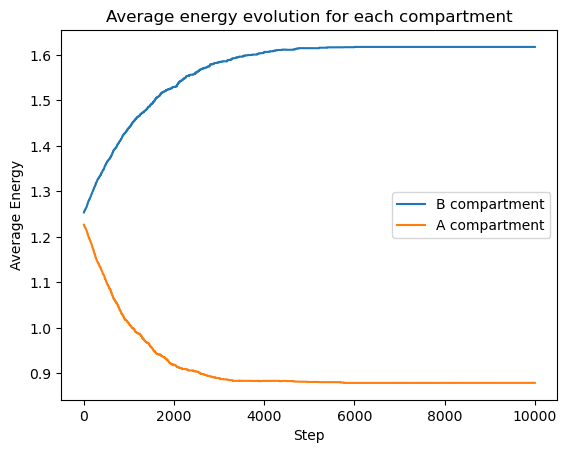

In [2]:
plt.plot(pasos, TB_List, label='B compartment')
plt.plot(pasos, TA_List, label='A compartment')
plt.xlabel("Step")
plt.ylabel("Average Energy")
plt.title("Average energy evolution for each compartment")
plt.legend()
plt.show()